In [ ]:
# Import PyTorch library for tensor operations and deep learning
import torch

# Import torchvision's datasets and image transformations
from torchvision import datasets, transforms

# Import DataLoader for batch loading, TensorDataset for wrapping data
from torch.utils.data import DataLoader, TensorDataset

# Import neural network modules and optimizers from PyTorch
from torch import nn, optim

# Import PIL for image loading and manipulation
from PIL import Image

# Import NumPy for numerical operations (arrays, math, etc.)
import numpy as np

# Import os for interacting with the operating system (file paths, etc.)
import os

# Import matplotlib for plotting graphs and images
import matplotlib.pyplot as plt

# --- 1. Preprocessing and Transforms ---

# Define the preprocessing pipeline for the training data:
transform_train = transforms.Compose([
    transforms.RandomRotation(15),             # Randomly rotate images by up to 15 degrees
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.01)),  # Randomly shift images horizontally and vertically
    transforms.ToTensor(),                     # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))        # Normalize tensor values to have mean 0.5 and std deviation 0.5
])

# Define the preprocessing pipeline for the testing/validation data:
transform_test = transforms.Compose([
    transforms.ToTensor(),                     # Convert images to PyTorch tensors (no random changes)
    transforms.Normalize((0.5,), (0.5,))        # Normalize tensor values the same way as training data
])


In [ ]:
# Define a custom function to load images and labels from a folder
def ProjectDataLoader(path='./digits', transform=None):
    images, labels = [], []                     # Initialize empty lists to hold images and labels
    for filename in os.listdir(path):            # Loop through each file in the specified folder
        if filename.endswith('.png'):            # Only process files that end with .png
            label = int(filename.split('-')[0])   # Extract label from filename (before the first '-')
            img_path = os.path.join(path, filename)  # Create full path to the image
            img = Image.open(img_path).convert('L').resize((28, 28))  # Open image, convert to grayscale ('L'), and resize to 28x28 pixels
            if transform:
                img = transform(img)              # If a transform is given, apply it
            else:
                img = transforms.ToTensor()(img)  # Otherwise, just convert image to tensor
            images.append(img)                    # Add the processed image tensor to the list
            labels.append(label)                  # Add the label to the list
    return torch.stack(images), torch.tensor(labels).long().squeeze()  
    # Stack all images into one tensor and convert labels into a tensor of type long (integers)

# Load the custom dataset using the ProjectDataLoader function with training transformations
custom_batch, custom_labels_tensor = ProjectDataLoader('./digits', transform=transform_train)

# Create a TensorDataset object that pairs images with their corresponding labels
custom_dataset = TensorDataset(custom_batch, custom_labels_tensor)

# Create a DataLoader to load batches of 16 images, shuffling the data each epoch
trainloader = DataLoader(custom_dataset, batch_size=16, shuffle=True)

# --- 3. Load MNIST for Testing Only ---

# Download and load the MNIST test dataset, applying the testing transformations
testset = datasets.MNIST('MNIST_data', train=False, download=True, transform=transform_test)

# Create a DataLoader to load test data in batches of 64, no shuffling needed
testloader = DataLoader(testset, batch_size=64, shuffle=False)


In [ ]:
# Define a simple feedforward neural network using nn.Sequential
model = nn.Sequential(
    nn.Flatten(),                    # Flatten the 28x28 image into a 784-element vector

    nn.Linear(28*28, 512),            # Fully connected layer: input 784 features, output 512 neurons
    nn.ReLU(),                        # Apply ReLU activation function for non-linearity

    nn.Linear(512, 256),              # Fully connected layer: input 512 features, output 256 neurons
    nn.ReLU(),                        # Apply ReLU activation

    nn.Linear(256, 64),               # Fully connected layer: input 256 features, output 64 neurons
    nn.ReLU(),                        # Apply ReLU activation

    nn.Linear(64, 10)                 # Final layer: input 64 features, output 10 classes (digits 0–9)
)


In [ ]:
# Define the loss function: CrossEntropyLoss (for classification tasks)
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer: Adam, with model parameters and a learning rate of 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize an empty list to store loss values for each epoch
loss_history = []  # <-- Add this before training loop

# Start the training loop for 200 epochs
for epoch in range(200):
    running_loss = 0                    # Initialize running loss for the epoch
    for images, labels in trainloader:  # Loop through batches of training data
        optimizer.zero_grad()           # Reset gradients from the previous step
        outputs = model(images)         # Forward pass: compute predicted outputs
        loss = loss_fn(outputs, labels) # Calculate loss between predictions and actual labels
        loss.backward()                 # Backpropagate the error
        optimizer.step()                # Update model parameters based on gradients
        running_loss += loss.item()     # Accumulate batch loss

    epoch_loss = running_loss / len(trainloader)  # Calculate average loss for the epoch
    loss_history.append(epoch_loss)               # Save the epoch's loss to the history list
    print(f"Epoch {epoch+1} Loss: {epoch_loss:.4f}")  # Print the loss for monitoring


Epoch 1 Loss: 2.3247
Epoch 2 Loss: 2.3048
Epoch 3 Loss: 2.2905
Epoch 4 Loss: 2.2780
Epoch 5 Loss: 2.2386
Epoch 6 Loss: 2.1589
Epoch 7 Loss: 2.1040
Epoch 8 Loss: 1.9734
Epoch 9 Loss: 1.8998
Epoch 10 Loss: 1.8479
Epoch 11 Loss: 1.8100
Epoch 12 Loss: 1.7183
Epoch 13 Loss: 1.6397
Epoch 14 Loss: 1.5367
Epoch 15 Loss: 1.5026
Epoch 16 Loss: 1.5469
Epoch 17 Loss: 1.4175
Epoch 18 Loss: 1.4473
Epoch 19 Loss: 1.4077
Epoch 20 Loss: 1.2921
Epoch 21 Loss: 1.2922
Epoch 22 Loss: 1.2586
Epoch 23 Loss: 1.2669
Epoch 24 Loss: 1.3553
Epoch 25 Loss: 1.2559
Epoch 26 Loss: 1.1528
Epoch 27 Loss: 1.2045
Epoch 28 Loss: 1.1959
Epoch 29 Loss: 1.1106
Epoch 30 Loss: 1.2624
Epoch 31 Loss: 1.1317
Epoch 32 Loss: 1.0990
Epoch 33 Loss: 1.1607
Epoch 34 Loss: 1.0671
Epoch 35 Loss: 0.9748
Epoch 36 Loss: 1.0380
Epoch 37 Loss: 1.1160
Epoch 38 Loss: 1.0165
Epoch 39 Loss: 1.0431
Epoch 40 Loss: 1.0630
Epoch 41 Loss: 0.9837
Epoch 42 Loss: 0.8453
Epoch 43 Loss: 0.8961
Epoch 44 Loss: 0.7648
Epoch 45 Loss: 0.9398
Epoch 46 Loss: 0.84

In [ ]:
# --- 7. Testing on MNIST Test Set ---

# Set the model to evaluation mode (disables dropout, etc.)
model.eval()

# Initialize counters for correct predictions and total samples
correct = 0
total = 0

# Turn off gradient calculations (makes testing faster and uses less memory)
with torch.no_grad():
    for images, labels in testloader:         # Loop through the test data
        outputs = model(images)                # Forward pass: get model predictions
        _, predicted = torch.max(outputs, 1)   # Take the class with the highest score
        total += labels.size(0)                # Add the number of samples in this batch
        correct += (predicted == labels).sum().item()  # Count how many predictions were correct

# Calculate and print the final test set accuracy as a percentage
print(f"\nAccuracy on MNIST test set: {100 * correct / total:.2f}%")



Accuracy on MNIST test set: 46.50%


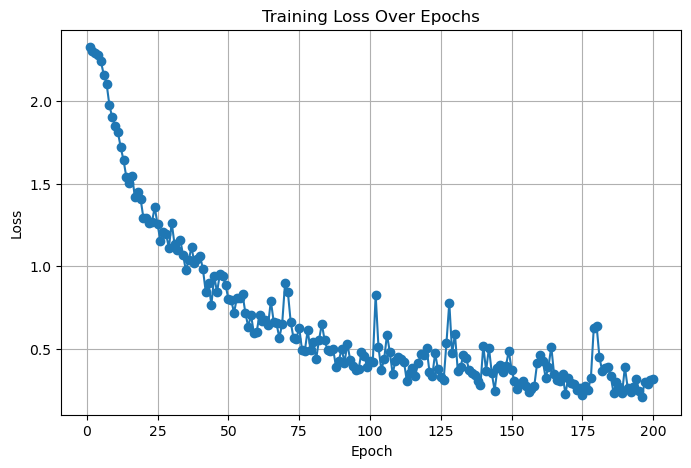

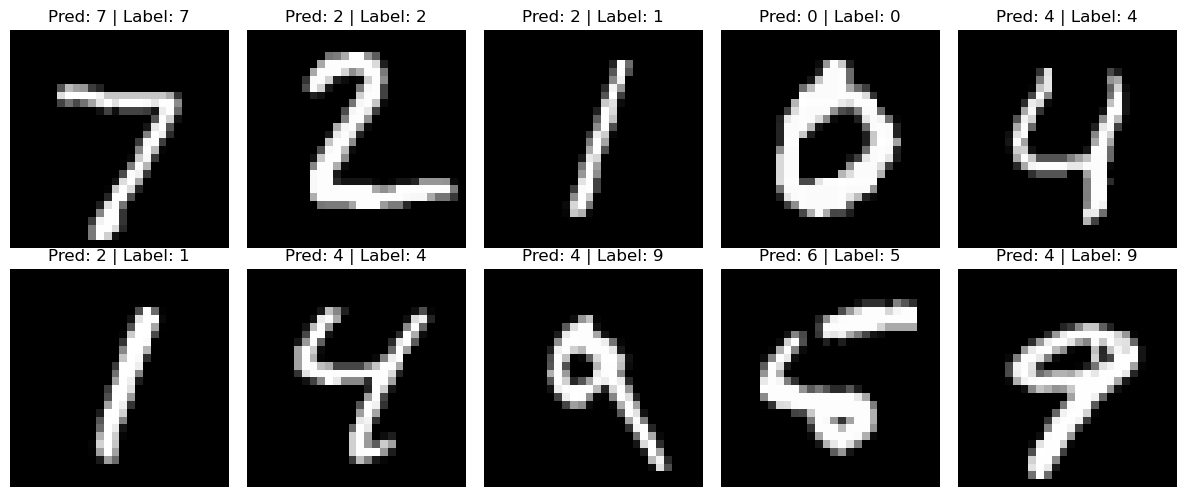

In [ ]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Create a new figure with a specific size
plt.figure(figsize=(8, 5))

# Plot training loss over epochs with markers on each point
plt.plot(range(1, len(loss_history)+1), loss_history, marker='o')

# Set plot title and labels
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Add a grid to the plot for better readability
plt.grid(True)

# Display the plot
plt.show()

# --- 8. (Optional) Visualize a Few Test Predictions ---

# Define a function to show predictions from the test set
def show_mnist_predictions(model, testloader):
    model.eval()                         # Set the model to evaluation mode
    images, labels = next(iter(testloader))  # Get the first batch of test images and labels
    outputs = model(images)               # Get model predictions for this batch
    _, preds = torch.max(outputs, 1)      # Get predicted class labels

    # Create a 2x5 grid of subplots to display 10 images
    fig, axs = plt.subplots(2, 5, figsize=(12, 5))
    for i, ax in enumerate(axs.flat):     # Loop through each subplot
        ax.imshow(images[i][0], cmap='gray')  # Show the image (single channel grayscale)
        ax.set_title(f"Pred: {preds[i].item()} | Label: {labels[i].item()}")  # Show predicted and true label
        ax.axis('off')                    # Hide the axes for clarity
    plt.tight_layout()                    # Adjust spacing to prevent overlap
    plt.show()                            # Display the figure

# Call the function to show a few test set predictions
show_mnist_predictions(model, testloader)
